In [2]:
DATA_PATH = '../data/given/'

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

df = pd.read_csv(DATA_PATH + '금융상품정보/은행수신상품.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/given/금융상품정보/은행수신상품.csv'

## 은행명, 은행코드

#### 은행명, 은행코드 병합

In [300]:
bank_name_code = df[['은행코드', '은행명']]

#### 은행코드 라벨링

In [301]:
bank_code_list = df['은행코드'].unique()
bank_code_dict = {code: idx for idx, code in enumerate(bank_code_list)}
df['bank_code_labeled'] = [ bank_code_dict[code] for code in df['은행코드'] ]
bank_name_code['bank_code_labeled'] = [ bank_code_dict[code] for code in df['은행코드'] ]

In [302]:
bank_name_code.drop_duplicates(inplace=True)
bank_name_code.sort_values(by='bank_code_labeled', inplace=True)
bank_name_code.to_csv('../data/modified/bank_name_code.csv', index=False)

## 상품코드, 상품명
* 은행코드와 동일하게 처리

In [303]:
product_name_code = df[['상품코드', '상품명']]
product_code_list = df['상품코드'].unique()
product_code_dict = {code: idx for idx, code in enumerate(product_code_list)}
df['product_code_labeled'] = [ product_code_dict[code] for code in df['상품코드'] ]
product_name_code['product_code_labeled'] = [ product_code_dict[code] for code in df['상품코드'] ]

#### 상품일련번호 제거
* 은행마다 달라서 product_code_labeled 로 통일

In [304]:
df.drop('상품일련번호', axis=1, inplace=True)

## 계약기간

#### 계약기간 라벨링

최소 기간을 기준으로
* 제한없음 : 0
* 단기 (~12개월): 1
* 중장기 (12개월~24개월): 2
* 장기 (24개월~): 3

In [305]:
df['계약기간개월수_최소구간'].unique()

array(['12개월 이상', '24개월', '제한없음', '60일 이상', '181일 이상', '12개월', '1개월 이상',
       '24개월 이상', '6개월 이상', '36개월', '3개월 이상', '6개월', '0개월 이상', '7일 이상',
       '180일 이상', '30일', '30일 이상', '3개월', '48개월 이상', '61일 이상', '36개월 이상',
       '6개월이상', '48개월', '18개월 이상', '12개월 초과', '36개월이상', '48개월이상', '3개월이상',
       '12개월이상', '11일 이상', '24개월이상', '06개월이상', '1개월이상', '21일 이상', '365일',
       '1일 이상', '90일', '90일 이상', '180일', '15개월 이상', '60개월', '30개월 이상',
       '1개월 이하', '1개월 초과', '365일 이상', '12개월 미만', '72개월 이상', '1개월 미만',
       '6개월 초과', '9개월 이상', '10개월 이상', '13개월 이상', '18개월', '1개월', '91일 이상',
       '730일 이상', '1095일', '7개월 이상', '25개월 이상', '37개월 이상', '92일 이상',
       '72개월', '78개월', '100일', '2개월 이상', '120개월 초과', '36 개월', '120일 이상',
       '271일 이상', '36개월 초과', '60개월(저축기간 3년, 지급기간 2년)',
       '모집기간 종료일 다음날로부터 12개월', '9개월', '2개월', '36개월제', '36개월 초괴', '31일',
       '200일', '12개월 이상 연단위', '7개월', '3개월(12주)', '13개월', '30개월',
       '274일 이상', '16개월 이상', '15개월이상', '9개월이상', '25개월이상', '18개월이상',
       '01개월이상'

In [306]:
df.rename(columns={'계약기간개월수_최소구간' : 'contract_term'}, inplace=True)
df['contract_term']

0       12개월 이상
1          24개월
2          제한없음
3        60일 이상
4          제한없음
         ...   
2775       제한없음
2776       제한없음
2777     12개월이상
2778      6개월이상
2779     12개월이상
Name: contract_term, Length: 2780, dtype: object

In [307]:
import re

def contract_term_to_month(term):
    if term[0] == '제':
        return -1
    month = int(re.findall(r'\d+', term)[0])
    if '일' in term:
        month /= 30
        
    return int(month)

In [308]:
df['contract_term'] = [ contract_term_to_month(term) for term in df['contract_term'] ]

In [309]:
def label_term(term):
    if term < 12:
        return 1
    elif term >= 12 and term < 24:
        return 2
    elif term > 24:
        return 3
    return 0

df['contract_term_label'] = [ label_term(term) for term in df['contract_term'] ]

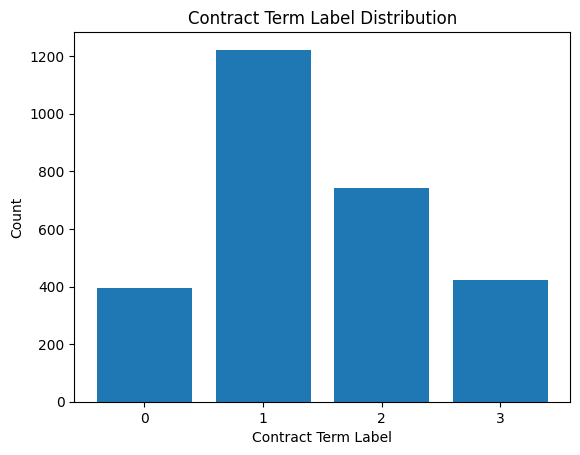

In [310]:
import matplotlib.pyplot as plt

term_counts = df['contract_term_label'].value_counts().sort_index()

plt.bar(term_counts.index, term_counts.values)

plt.xlabel('Contract Term Label')
plt.ylabel('Count')
plt.title('Contract Term Label Distribution')
plt.xticks(range(0,4,1))
plt.show()

## 가입금액

In [311]:
df['가입금액_최소구간'].unique()

array(['제한없음', '0원', '5백만원', '10만원 이상', '십만원 이상', '1원 이상', '1천만원 이상',
       '100원', '1천만원', '1백만원 이상', '100,000원 이상', '5백만원 이상', '0원이상',
       '10만원', '10백만원', '3백만원 이상', '10만원이상', '1만원', '0원 이상',
       '3백만원 이상 (인터넷뱅킹 및 스마트폰뱅킹으로 가입 시 1 만원 이상)', '1백만원',
       '개설보증금 이상\n - 특별시/광역시 : 500만원\n - 시 지역 : 200만원\n - 기타지역 : 120만원',
       '1만원 이상', '1천만원 초과', '1십만원 이상', '3백만원', '3천만원 이상', '1억원 이상',
       '제힌없음', '1,000,000원 이상', '1천원이상', '300만원 이상', '100만원', '1000만원이상',
       '100만원 이상', '100만원 이싱', '2천만원 이상', '500만원 이상', '신규 시 500만원 이상',
       '300만원', '100만원이상', '500만원이상'], dtype=object)

In [312]:
def parse_amount(text):
    if '없음' in text:
        return 0
    korean_numbers = {
        '천': 1000,
        '백': 100,
        '만': 10000,
        '억': 100000000
    }
    text = text.replace(',', '')
    num_arr = re.findall(r'\d+', text)
    if len(num_arr) == 0:
        num = 1
    else:
        num = int(num_arr[0])
    scale = re.findall(r'[백천만억원]', text)
    for c in scale:
        if c == '원':
            break
        num *= korean_numbers[c]
    return num

In [313]:
df['register_min_amount'] = [ parse_amount(text) for text in df['가입금액_최소구간'] ]

In [314]:
df['register_min_amount'].value_counts()

register_min_amount
0            1696
100000        613
1000000       197
10000000       62
10000          61
3000000        56
5000000        51
100            23
1               6
1000            6
20000000        6
100000000       2
30000000        1
Name: count, dtype: int64

In [315]:
df['register_max_amount'] = [ parse_amount(text) for text in df['가입금액_최대구간'] ]

In [316]:
df['register_max_amount'].value_counts()

register_max_amount
0              2646
100000000        26
1000000000       22
500000000        16
50000000         16
10000000000      12
5000000000        9
10000000          5
30000000          5
1850000           4
50000             3
300000000         3
200000000         3
2000000000        3
10000             2
30000             1
100000            1
3000000000        1
30000000000       1
2000000           1
Name: count, dtype: int64

## 통장거치식 신규가입금액 단위

In [317]:
df['통장거치식_신규가입금액_단위'].unique()

array(['제한없음', '제한없음(원단위)', '0원 이상', "'0원' 통장으로만 가입 가능", '5백만원 이상 원단위',
       '10만원 이상(원단위)', '십만원 이상  원단위', '10만원 이상', '5백만원 이상', '1천만원 이상',
       '100원 이상', '1백만원 이상', '100,000원 이상(원단위)', '0원이상', '10만원 이상 원단위',
       '1원 이상', '0원 계좌로만 개설 가능', '10백만원 이상 원단위', '0원으로만 신규 가능',
       '‘0원 계좌’로만 가입 가능', '1원 이상 원단위', '10만원이상', '1만원 이상 (원단위)',
       '0원통장으로만 가입가능', '0원', '0원 통장으로만 가입 가능', '제한없음(개설보증금 2백만원)',
       '0원 이상(원단위)', '3백만원 이상 (인터넷뱅킹 및 스마트폰뱅킹으로 가입 시 1 만원 이상)', '1원 단위',
       '0원 통장으로만 신규가능', '1백만원 이상 (원 단위)', '1백만원 이상 원단위', '1백만원 이상 (원단위)',
       '1원 이상 (1원단위)', '1만원 이상', '1천만원 이상 원단위', '3백만원 이상', '1십만원 이상',
       '3백만원 이상 (원 단위)', '십만원 이상', '0 원 이상', '액면금액기준 1천만원 이상',
       '10백만원이상 원단위(등록발행은 5백만원 이상)', '1백만원 이상(원단위)', '1,000,000원 이상(원단위)',
       '1천원이상', '계좌당 1백만원 이상', '300만원 이상', '100만원 이상 원단위', '3백만원 이상 원단위',
       '1만원 이상 원단위', '1000만원이상', '500만원이상 원단위', '100만원 이상', '2천만원 이상',
       '500만원 이상', '1백만원 단위', '계좌당 1만원 이상', '500만원 이상 만원 단위 가입 가능',
       '신규 시 500만원 이상

In [318]:
df['init_deposit_unit'] = [ parse_amount(text) for text in df['통장거치식_신규가입금액_단위'] ]

## 정제 df 생성
* model 학습에 쓸 변수들을 선별한 df

In [319]:
df_filtered = df[['bank_code_labeled', 'product_code_labeled', 'contract_term_label', 'register_min_amount', 'register_max_amount', 'init_deposit_unit']]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   bank_code_labeled     2780 non-null   int64
 1   product_code_labeled  2780 non-null   int64
 2   contract_term_label   2780 non-null   int64
 3   register_min_amount   2780 non-null   int64
 4   register_max_amount   2780 non-null   int64
 5   init_deposit_unit     2780 non-null   int64
dtypes: int64(6)
memory usage: 130.4 KB


## 적립식 월부금

In [320]:
df_filtered['monthly_installment_unit'] = [ parse_amount(text) for text in df['적립식_월부금_단위'] ]
df_filtered['monthly_installment_unit'].value_counts()

monthly_installment_unit
0         1671
10000      604
1000       248
100000      85
20000       53
50000       29
100         28
1           24
10          21
500          8
300000       4
150000       2
30000        1
42000        1
82000        1
Name: count, dtype: int64

## 신규채널
* 0: 제한없음
* 1: 영업점
* 2: 인터넷뱅킹
* 3: 스마트뱅킹
* 5: 콜센타
* 6: 모바일웹뱅킹
* 7: 계좌이체
* 8: 텔레뱅킹

In [321]:
df['channel_label'] = [ re.findall(r'\d+', channels) for channels in df['신규채널'] ]
df['channel_label_tostring'] = [ ' '.join(arr) for arr in df['channel_label'] ]

In [322]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(token_pattern=r'\b\d+\b')

channels_arr = count_vec.fit_transform(df['channel_label_tostring'])
channels_vectorized = pd.DataFrame(channels_arr.toarray(), columns=count_vec.get_feature_names_out())
df_filtered = pd.concat([df_filtered, channels_vectorized], axis=1)

In [323]:
df_filtered.rename(columns={
    '0':'channel_noLimit',
    '1':'channel_bank',
    '2':'channel_internet',
    '3':'channel_smart',
    '5':'channel_call',
    '6':'channel_web',
    '7':'channel_account',
    '8':'channel_tel',
},
inplace=True                 )
df_filtered.head()

bank_code_labeled  product_code_labeled  contract_term_label  \
0                  0                     0                    2   
1                  0                     0                    0   
2                  1                     1                    1   
3                  2                     2                    1   
4                  3                     3                    1   

   register_min_amount  register_max_amount  init_deposit_unit  \
0                    0                    0                  0   
1                    0                    0                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

   monthly_installment_unit  channel_noLimit  channel_bank  channel_internet  \
0                    100000                0             1                 1   
1                    100000                0             1                 1   
2                         0                0             1                 0   
3                         0                0             1                 0   
4                         0                0             1                 0   

   channel_smart  channel_call  channel_web  channel_account  channel_tel  
0              1             0            0                0            0  
1              1             0            0                0            0  
2              1             0            0                0            0  
3              0             0            0                0            0  
4              0             0            0                0            0

## 예금 입출금 방식
* 1:자유입출식(통장식)
* 2:거치식(목돈운용)
* 3:적립식(목돈마련)

In [324]:
df_filtered['deposit_type'] = [ re.findall(r'\d+', type)[0] for type in df['예금입출금방식'] ]

## 이자 계산 방법
* 1:단리
* 2:복리

In [325]:
df_filtered['interest_type'] = [ re.findall(r'\d+', type)[0] for type in df['이자계산방법'] ]

## 적립식_부금납입주기
* 0: 제한없음
* 1: 매월납부
* 2: 분기납부
* 3: 자유적립식
* 4: 일납부
* 5: 주납부
* 6: 2월납부

In [326]:
# 결측치 처리 ('제한없음' 으로)
df['적립식_부금납입주기'] = [ '제한없음' if pd.isna(period) else period for period in df['적립식_부금납입주기'] ]

In [327]:
df['deopsit_period'] = [ re.findall(r'\d+', type) for type in df['적립식_부금납입주기'] ]
df['deopsit_period_tostring'] = [ ' '.join(arr) for arr in df['deopsit_period'] ]

In [328]:
count_vec = CountVectorizer(token_pattern=r'\b\d+\b')

deposit_period_arr = count_vec.fit_transform(df['deopsit_period_tostring'])
deposit_period_vectorized = pd.DataFrame(deposit_period_arr.toarray(), columns=count_vec.get_feature_names_out())
df_filtered = pd.concat([df_filtered, deposit_period_vectorized], axis=1)

In [329]:
df_filtered.rename(columns={
    '0':'deposit_period_noLimit',
    '1':'deposit_period_monthly',
    '2':'deposit_period_quarter',
    '3':'deposit_period_free',
    '4':'deposit_period_daily',
    '5':'deposit_period_weekly',
    '6':'deposit_period_Feb',
},
inplace=True                 )
df_filtered.head()

bank_code_labeled  product_code_labeled  contract_term_label  \
0                  0                     0                    2   
1                  0                     0                    0   
2                  1                     1                    1   
3                  2                     2                    1   
4                  3                     3                    1   

   register_min_amount  register_max_amount  init_deposit_unit  \
0                    0                    0                  0   
1                    0                    0                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

   monthly_installment_unit  channel_noLimit  channel_bank  channel_internet  \
0                    100000                0             1                 1   
1                    100000                0             1                 1   
2                         0                0             1                 0   
3                         0                0             1                 0   
4                         0                0             1                 0   

   channel_smart  channel_call  channel_web  channel_account  channel_tel  \
0              1             0            0                0            0   
1              1             0            0                0            0   
2              1             0            0                0            0   
3              0             0            0                0            0   
4              0             0            0                0            0   

  deposit_type interest_type  deposit_period_monthly  deposit_period_quarter  \
0            3             1                       1                       0   
1            3             1                       1                       0   
2            1             1                       0                       0   
3            2             2                       0                       0   
4            1             1                       0                       0   

   deposit_period_free  deposit_period_daily  deposit_period_weekly  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    0                     0                      0   
4                    0                     0                      0   

   deposit_period_Feb  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

## 우대금리조건

In [330]:
def is_about_prime_rate(text):
    return '우대금리조건' in text and '_여부' in text

prime_rate_list = [condition for condition in df.columns if is_about_prime_rate(condition)]
prime_rate_list

['우대금리조건_고객예금실적_여부',
 '우대금리조건_우수고객우대제도_여부',
 '우대금리조건_가입금액우대_여부',
 '우대금리조건_아파트관리비이체_여부',
 '우대금리조건_공과금이체_여부',
 '우대금리조건_급여이체_여부',
 '우대금리조건_예금자동이체_여부',
 '우대금리조건_예금자동이체_여부_조건',
 '우대금리조건_보험료자동이체_여부',
 '우대금리조건_보험료자동이체_여부_조건',
 '우대금리조건_연금자동이체_여부',
 '우대금리조건_연금자동이체_여부_조건',
 '우대금리조건_신용카드가맹점결제계좌_여부',
 '우대금리조건_신용카드결제계좌_여부',
 '우대금리조건_신용카드사용금액_여부',
 '우대금리조건_체크카드연계_여부',
 '우대금리조건_제휴카드연계_여부',
 '우대금리조건_재유치_여부',
 '우대금리조건_카드사용실적_여부',
 '우대금리조건_퇴직금예치_여부',
 '우대금리조건_고객특성우대_여부',
 '우대금리조건_장병우대_여부',
 '우대금리조건_농어민우대_여부',
 '우대금리조건_어린이우대_여부',
 '우대금리조건_학생우대_여부',
 '우대금리조건_첫거래우대_여부',
 '우대금리조건_고객연령우대_여부',
 '우대금리조건_비대면채널_여부',
 '우대금리조건_인터넷뱅킹_여부',
 '우대금리조건_모바일뱅킹_여부',
 '우대금리조건_모바일앱_여부',
 '우대금리조건_오픈뱅킹_여부',
 '우대금리조건_마이데이터_여부',
 '우대금리조건_상품미보유_여부',
 '우대금리조건_만기금액우대_여부',
 '우대금리조건_마케팅활용동의_여부',
 '우대금리조건_위치인증_여부',
 '우대금리조건_기타1_여부',
 '우대금리조건_기타2_여부',
 '우대금리조건_기타3_여부',
 '우대금리조건_기타4_여부',
 '우대금리조건_기타5_여부']

In [331]:
prime_rate_flag = df[prime_rate_list]
prime_rate_flag.fillna(0, inplace=True)
prime_rate_flag.replace('Y', 1, inplace=True)
prime_rate_flag = prime_rate_flag.astype(int)
prime_rate_flag

우대금리조건_고객예금실적_여부  우대금리조건_우수고객우대제도_여부  우대금리조건_가입금액우대_여부  \
0                    0                   0                 0   
1                    0                   0                 0   
2                    0                   0                 0   
3                    0                   0                 0   
4                    0                   0                 0   
...                ...                 ...               ...   
2775                 0                   0                 0   
2776                 0                   0                 0   
2777                 0                   0                 0   
2778                 0                   0                 0   
2779                 0                   0                 0   

      우대금리조건_아파트관리비이체_여부  우대금리조건_공과금이체_여부  우대금리조건_급여이체_여부  우대금리조건_예금자동이체_여부  \
0                      0                0               0                 0   
1                      0                0               0                 0   
2                      0                0               0                 0   
3                      0                0               0                 0   
4                      0                0               0                 0   
...                  ...              ...             ...               ...   
2775                   0                0               0                 0   
2776                   0                0               0                 0   
2777                   0                0               0                 0   
2778                   0                0               0                 0   
2779                   0                0               0                 0   

      우대금리조건_예금자동이체_여부_조건  우대금리조건_보험료자동이체_여부  우대금리조건_보험료자동이체_여부_조건  \
0                       0                  0                     0   
1                       0                  0                     0   
2                       0                  0                     0   
3                       0                  0                     0   
4                       0                  0                     0   
...                   ...                ...                   ...   
2775                    0                  0                     0   
2776                    0                  0                     0   
2777                    0                  0                     0   
2778                    0                  0                     0   
2779                    0                  0                     0   

      우대금리조건_연금자동이체_여부  우대금리조건_연금자동이체_여부_조건  우대금리조건_신용카드가맹점결제계좌_여부  \
0                    0                    0                      0   
1                    0                    0                      0   
2                    0                    0                      0   
3                    0                    0                      0   
4                    0                    0                      0   
...                ...                  ...                    ...   
2775                 0                    0                      0   
2776                 0                    0                      0   
2777                 0                    0                      0   
2778                 0                    0                      0   
2779                 0                    0                      0   

      우대금리조건_신용카드결제계좌_여부  우대금리조건_신용카드사용금액_여부  우대금리조건_체크카드연계_여부  \
0                      0                   0                 1   
1                      0                   0                 1   
2                      0                   0                 0   
3                      0                   0                 0   
4                      0                   0                 0   
...                  ...                 ...               ...   
2775                   0                   0                 0   
2776                   0                   0                 0   
2777        

In [332]:
# column 이름 수정
substr_to_erase = ['우대금리조건_', '_여부', '_조건']

def clean_col_name(col_name):
    for substr in substr_to_erase:
        col_name = col_name.replace(substr, '')
    return col_name

prime_rate_flag.columns = [ clean_col_name(col_name) for col_name in prime_rate_flag.columns ]

In [333]:
prime_rate_flag.head()

고객예금실적  우수고객우대제도  가입금액우대  아파트관리비이체  공과금이체  급여이체  예금자동이체  예금자동이체  보험료자동이체  \
0       0         0       0         0      0     0       0       0        0   
1       0         0       0         0      0     0       0       0        0   
2       0         0       0         0      0     0       0       0        0   
3       0         0       0         0      0     0       0       0        0   
4       0         0       0         0      0     0       0       0        0   

   보험료자동이체  연금자동이체  연금자동이체  신용카드가맹점결제계좌  신용카드결제계좌  신용카드사용금액  체크카드연계  제휴카드연계  \
0        0       0       0            0         0         0       1       0   
1        0       0       0            0         0         0       1       0   
2        0       0       0            0         0         0       0       0   
3        0       0       0            0         0         0       0       0   
4        0       0       0            0         0         0       0       0   

   재유치  카드사용실적  퇴직금예치  고객특성우대  장병우대  농어민우대  어린이우대  학생우대  첫거래우대  고객연령우대  비대면채널  \
0    0       0      0       0     0      0      0     0      0       0      0   
1    0       0      0       0     0      0      0     0      0       0      0   
2    0       0      0       0     0      0      0     0      0       0      0   
3    0       0      0       0     0      0      0     0      0       0      0   
4    0       0      0       0     0      0      0     0      0       0      0   

   인터넷뱅킹  모바일뱅킹  모바일앱  오픈뱅킹  마이데이터  상품미보유  만기금액우대  마케팅활용동의  위치인증  기타1  기타2  \
0      0      1     0     0      0      0       0        0     0    0    0   
1      0      1     0     0      0      0       0        0     0    0    0   
2      0      0     0     0      0      0       0        0     0    0    0   
3      0      0     0     0      0      0       0        0     0    0    0   
4      0      0     0     0      0      0       0        0     0    0    0   

   기타3  기타4  기타5  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [334]:
df_filtered = pd.concat([df_filtered, prime_rate_flag], axis=1)
df_filtered.head()

bank_code_labeled  product_code_labeled  contract_term_label  \
0                  0                     0                    2   
1                  0                     0                    0   
2                  1                     1                    1   
3                  2                     2                    1   
4                  3                     3                    1   

   register_min_amount  register_max_amount  init_deposit_unit  \
0                    0                    0                  0   
1                    0                    0                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

   monthly_installment_unit  channel_noLimit  channel_bank  channel_internet  \
0                    100000                0             1                 1   
1                    100000                0             1                 1   
2                         0                0             1                 0   
3                         0                0             1                 0   
4                         0                0             1                 0   

   channel_smart  channel_call  channel_web  channel_account  channel_tel  \
0              1             0            0                0            0   
1              1             0            0                0            0   
2              1             0            0                0            0   
3              0             0            0                0            0   
4              0             0            0                0            0   

  deposit_type interest_type  deposit_period_monthly  deposit_period_quarter  \
0            3             1                       1                       0   
1            3             1                       1                       0   
2            1             1                       0                       0   
3            2             2                       0                       0   
4            1             1                       0                       0   

   deposit_period_free  deposit_period_daily  deposit_period_weekly  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    0                     0                      0   
4                    0                     0                      0   

   deposit_period_Feb  고객예금실적  우수고객우대제도  가입금액우대  아파트관리비이체  공과금이체  급여이체  \
0                   0       0         0       0         0      0     0   
1                   0       0         0       0         0      0     0   
2                   0       0         0       0         0      0     0   
3                   0       0         0       0         0      0     0   
4                   0       0         0       0         0      0     0   

   예금자동이체  예금자동이체  보험료자동이체  보험료자동이체  연금자동이체  연금자동이체  신용카드가맹점결제계좌  신용카드결제계좌  \
0       0       0        0        0       0       0            0         0   
1       0       0        0        0       0       0            0         0   
2       0       0        0        0       0       0            0         0   
3       0       0        0        0       0       0            0         0   
4       0       0        0        0       0       0            0         0   

   신용카드사용금액  체크카드연계  제휴카드연계  재유치  카드사용실적  퇴직금예치  고객특성우대  장병우대  농어민우대  어린이우대  \
0         0       1       0    0       0      0       0     0      0      0   
1         0       1       0    0       0      0       0     0      0      0   
2         0       0       0    0       0      0       0     0      0      0   
3         0       0       0    0       0      0       0     0      0      0   
4         0       0       0    0       0  

In [335]:
df_filtered.to_excel('../data/modified/financial_product_info.xlsx')